In [49]:
# based on https://medium.com/@erikhallstrm/hello-world-rnn-83cd7105b767

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

num_epochs = 100
total_series_length = 5000 #50000
echo_step = 3
batch_size = 5
truncated_backprop_length = 15
state_size = 4
num_classes = 2

num_batches = total_series_length//batch_size//truncated_backprop_length
print(num_batches)

66


In [39]:
def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))
    y = y.reshape((batch_size, -1))

    return (x, y)

(x, y) = generateData()
print(x[:5])

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 1]
 [0 0 1 ... 1 0 0]]


In [40]:
batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])

In [41]:
print(np.random.rand(state_size+1, state_size))
print(np.random.rand(state_size, num_classes))

W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

[[0.86054688 0.46056293 0.45301435 0.68700096]
 [0.71153813 0.38451748 0.38462607 0.72029826]
 [0.6002404  0.11632008 0.84274304 0.44599553]
 [0.31074425 0.2643724  0.83121527 0.97207301]
 [0.90663038 0.28477993 0.99519641 0.70719941]]
[[0.60444346 0.51607703]
 [0.71722979 0.97150327]
 [0.27621536 0.07103695]
 [0.33409188 0.48502468]]


In [42]:
inputs_series = tf.unstack(batchX_placeholder, axis=1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

In [48]:
print(tf.shape(inputs_series))
print(len(inputs_series))


Tensor("Shape_2:0", shape=(2,), dtype=int32)
15


In [44]:
current_state = init_state
states_series = []
for current_input in inputs_series:
    current_input = tf.reshape(current_input, [batch_size, 1])
    input_and_state_concatenated = tf.concat([current_input, current_state], 1)  # Increasing number of columns

    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W) + b)  # Broadcasted addition
    states_series.append(next_state)
    current_state = next_state

In [45]:
logits_series = [tf.matmul(state, W2) + b2 for state in states_series] #Broadcasted addition
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels) for logits, labels in zip(logits_series,labels_series)]
total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

In [46]:
def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


New data, epoch 0
Step 0 Loss 0.7124228


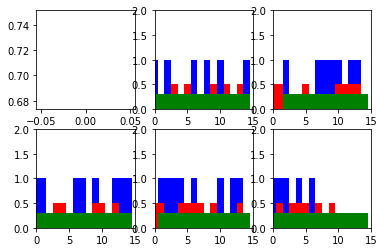

New data, epoch 1
Step 0 Loss 0.69394815


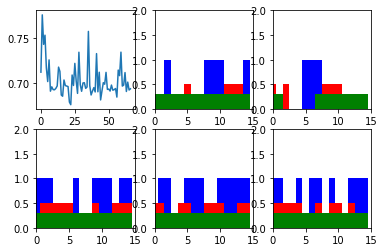

New data, epoch 2
Step 0 Loss 0.69344836


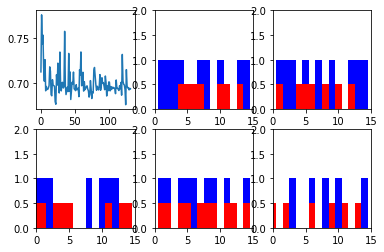

New data, epoch 3
Step 0 Loss 0.6824189


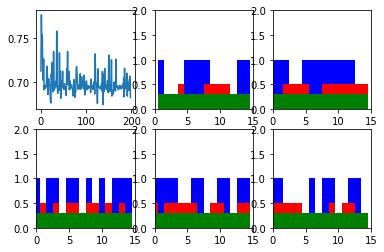

New data, epoch 4
Step 0 Loss 0.6928493


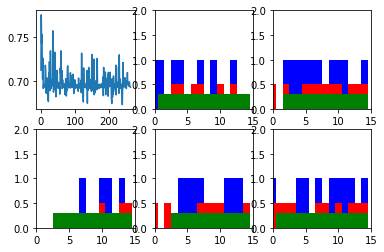

New data, epoch 5
Step 0 Loss 0.6962265


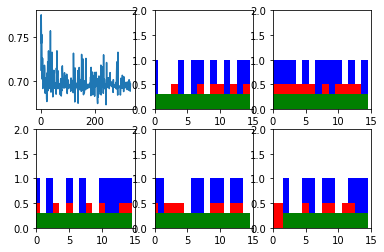

New data, epoch 6
Step 0 Loss 0.69062537


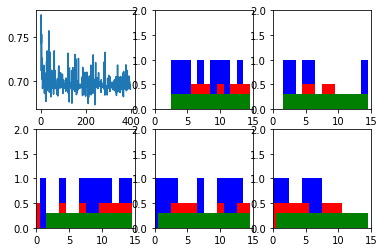

New data, epoch 7
Step 0 Loss 0.692071


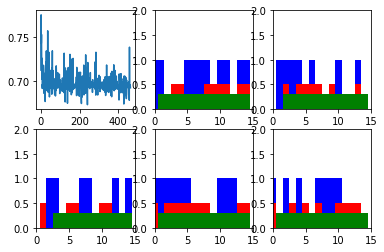

New data, epoch 8
Step 0 Loss 0.68816257


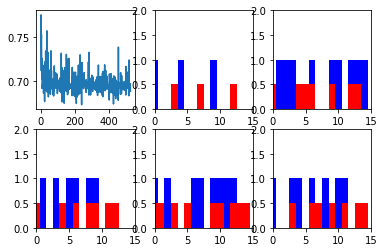

New data, epoch 9
Step 0 Loss 0.6993292


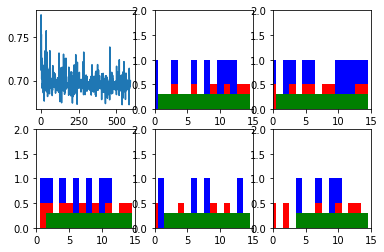

New data, epoch 10
Step 0 Loss 0.69354117


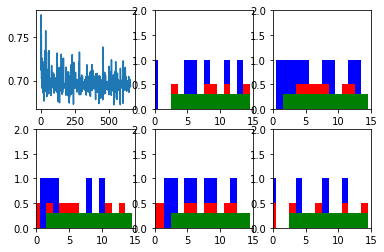

New data, epoch 11
Step 0 Loss 0.6855363


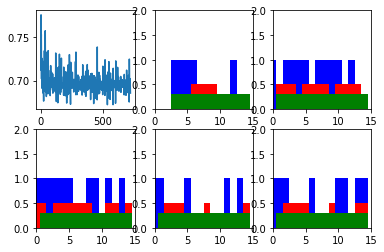

New data, epoch 12
Step 0 Loss 0.69771904


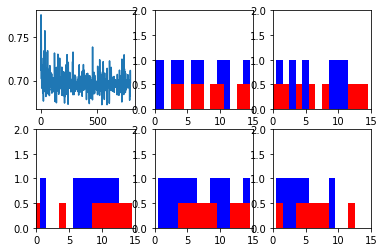

New data, epoch 13
Step 0 Loss 0.6914736


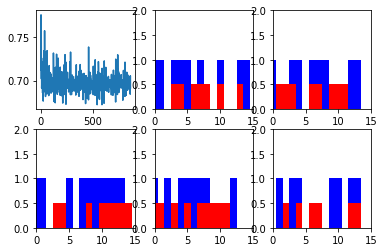

New data, epoch 14
Step 0 Loss 0.68401074


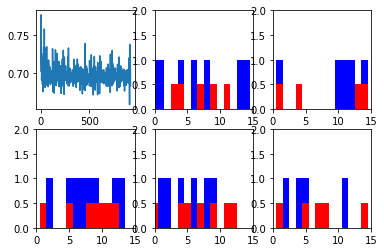

New data, epoch 15
Step 0 Loss 0.6808829


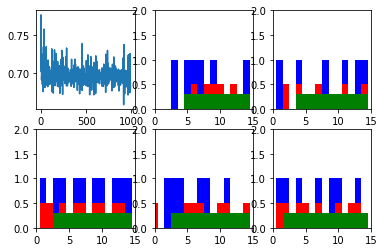

New data, epoch 16
Step 0 Loss 0.686712


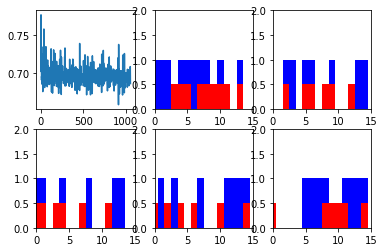

New data, epoch 17
Step 0 Loss 0.6852975


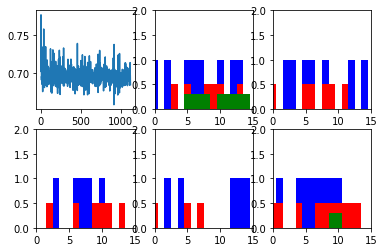

New data, epoch 18
Step 0 Loss 0.67456925


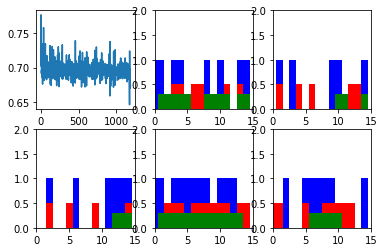

New data, epoch 19
Step 0 Loss 0.46223435


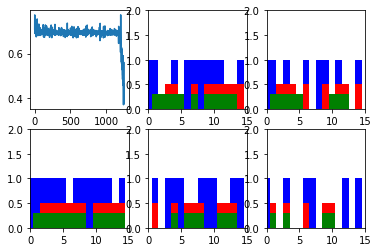

New data, epoch 20
Step 0 Loss 0.20162483


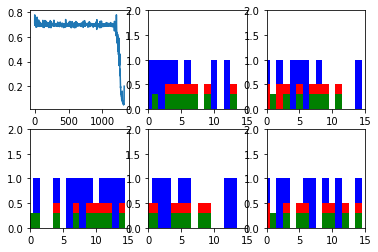

New data, epoch 21
Step 0 Loss 0.13787197


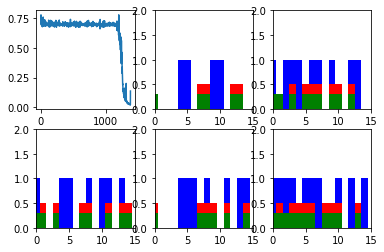

New data, epoch 22
Step 0 Loss 0.16320956


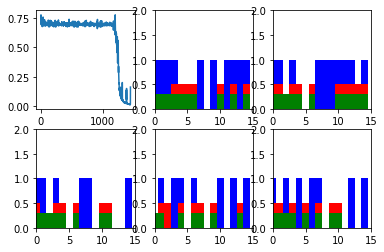

New data, epoch 23
Step 0 Loss 0.1825665


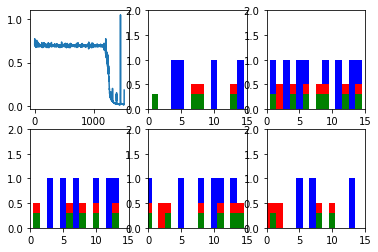

New data, epoch 24
Step 0 Loss 0.14301577


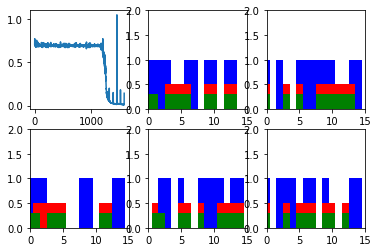

New data, epoch 25
Step 0 Loss 0.14296007


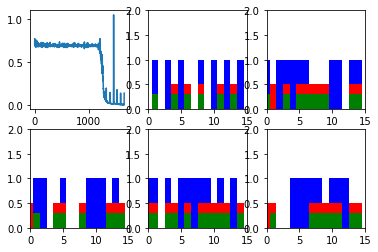

New data, epoch 26
Step 0 Loss 0.17745723


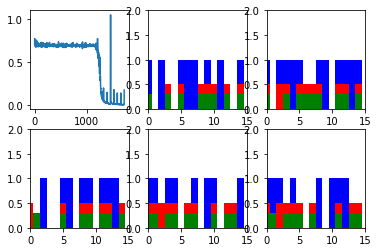

New data, epoch 27
Step 0 Loss 0.16721389


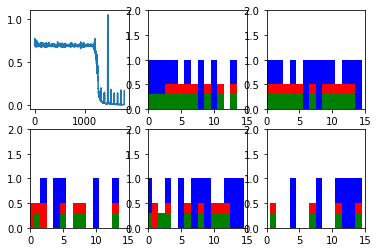

New data, epoch 28
Step 0 Loss 0.17020157


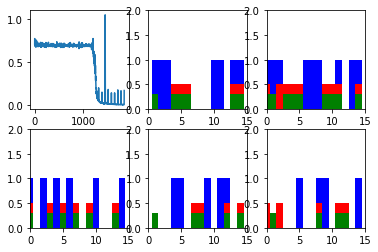

New data, epoch 29
Step 0 Loss 0.14363371


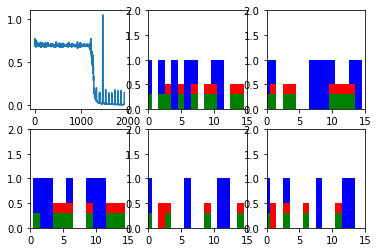

New data, epoch 30
Step 0 Loss 0.17214747


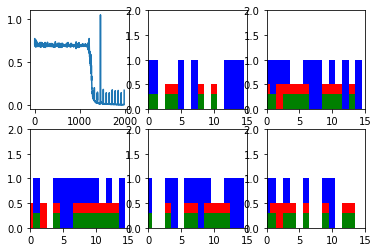

New data, epoch 31
Step 0 Loss 0.14850508


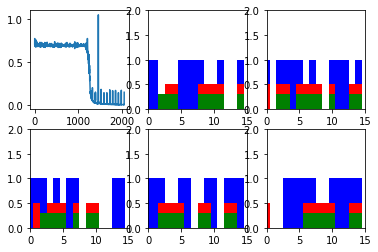

New data, epoch 32
Step 0 Loss 0.13783185


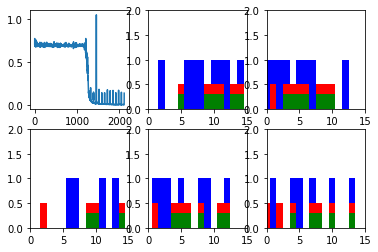

New data, epoch 33
Step 0 Loss 0.1365477


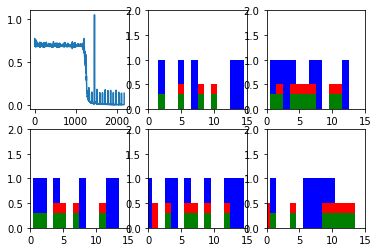

New data, epoch 34
Step 0 Loss 0.1480662


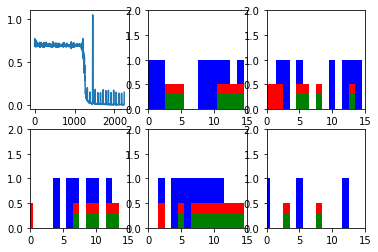

New data, epoch 35
Step 0 Loss 0.1333973


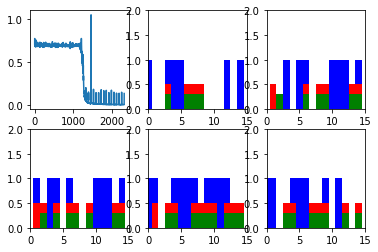

New data, epoch 36
Step 0 Loss 0.24104032


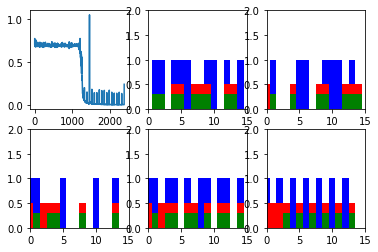

New data, epoch 37
Step 0 Loss 0.16329738


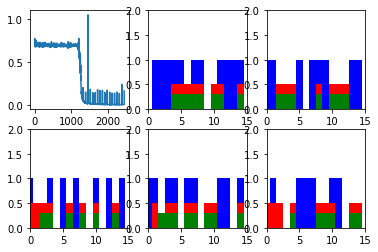

New data, epoch 38
Step 0 Loss 0.14352097


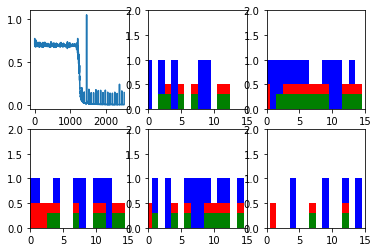

New data, epoch 39
Step 0 Loss 0.12360004


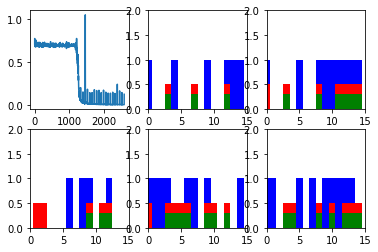

New data, epoch 40
Step 0 Loss 0.15320621


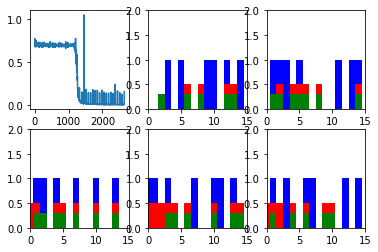

New data, epoch 41
Step 0 Loss 0.13809375


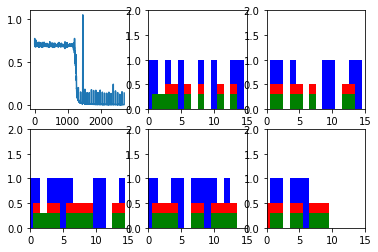

New data, epoch 42
Step 0 Loss 0.1285314


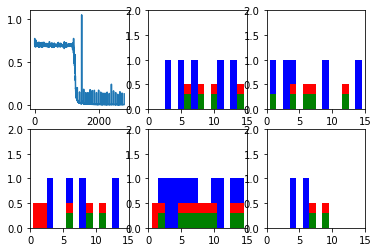

New data, epoch 43
Step 0 Loss 0.14450853


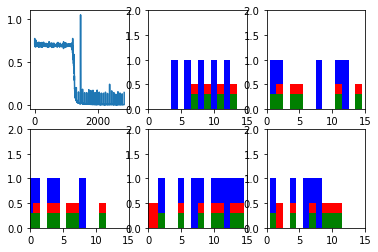

New data, epoch 44
Step 0 Loss 0.15256299


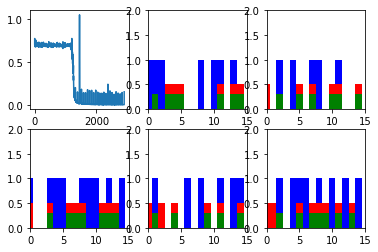

New data, epoch 45
Step 0 Loss 0.13663149


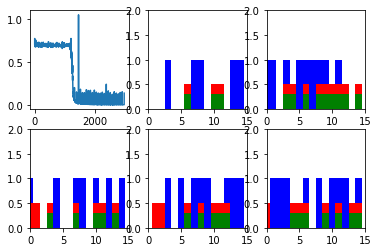

New data, epoch 46
Step 0 Loss 0.1466693


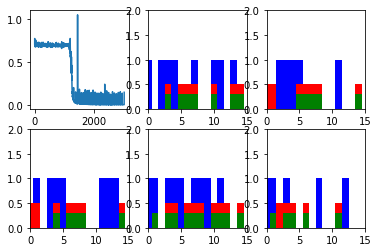

New data, epoch 47
Step 0 Loss 0.15931836


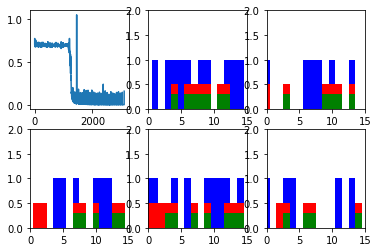

New data, epoch 48
Step 0 Loss 0.20761943


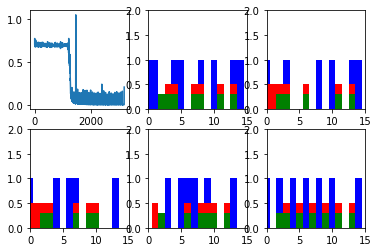

New data, epoch 49
Step 0 Loss 0.17371736


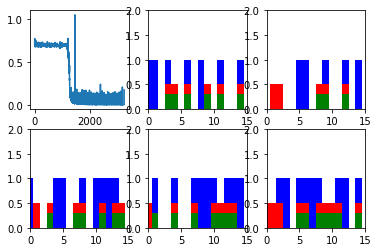

New data, epoch 50
Step 0 Loss 0.16155027


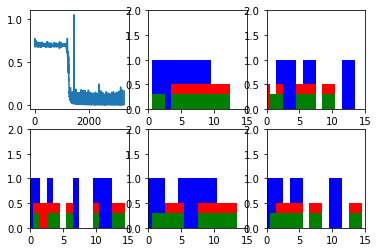

New data, epoch 51
Step 0 Loss 0.1544131


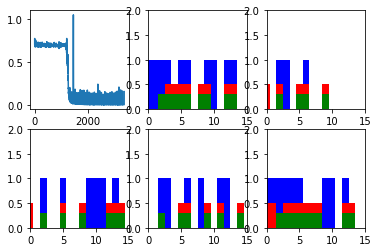

New data, epoch 52
Step 0 Loss 0.14175758


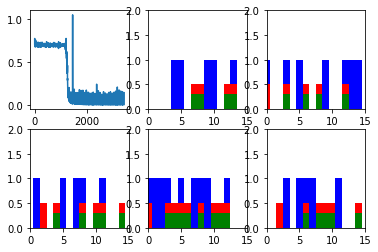

New data, epoch 53
Step 0 Loss 0.14917001


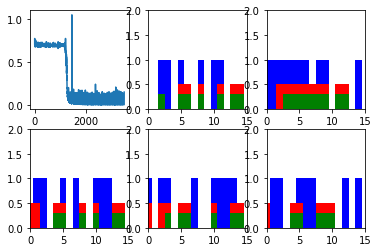

New data, epoch 54
Step 0 Loss 0.1280117


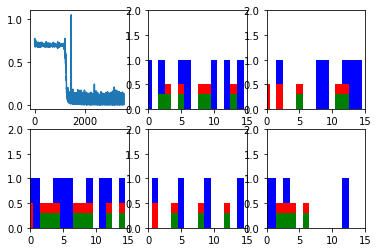

New data, epoch 55
Step 0 Loss 0.14427398


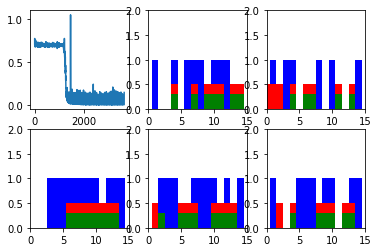

New data, epoch 56
Step 0 Loss 0.15277258


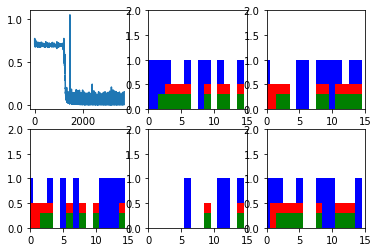

New data, epoch 57
Step 0 Loss 0.13259959


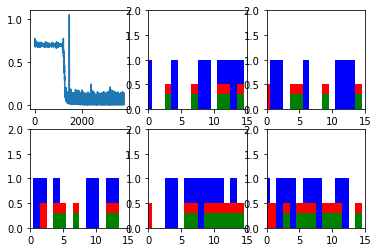

New data, epoch 58
Step 0 Loss 0.1458007


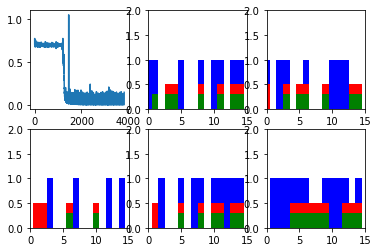

New data, epoch 59
Step 0 Loss 0.11628001


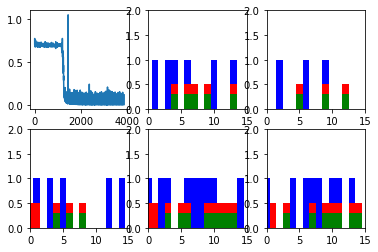

New data, epoch 60
Step 0 Loss 0.15143412


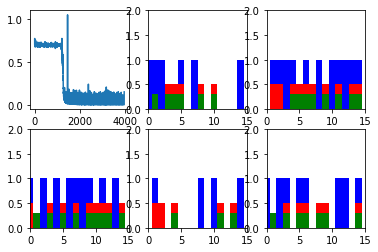

New data, epoch 61
Step 0 Loss 0.13201457


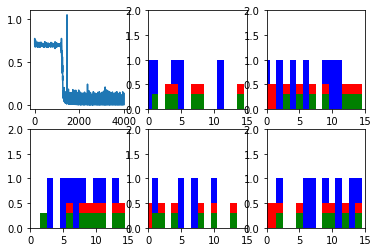

New data, epoch 62
Step 0 Loss 0.14701259


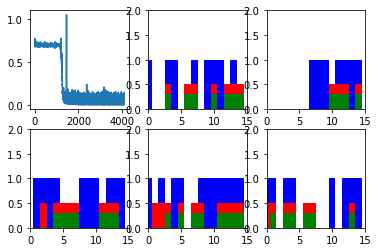

New data, epoch 63
Step 0 Loss 0.22485158


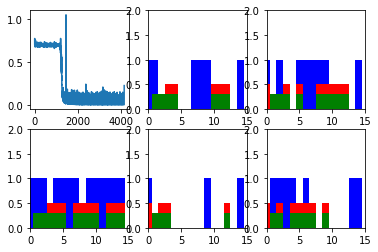

New data, epoch 64
Step 0 Loss 0.087286435


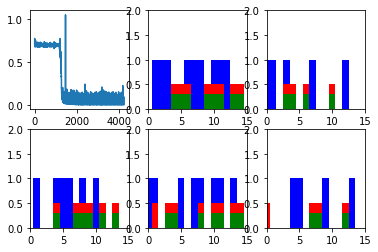

New data, epoch 65
Step 0 Loss 0.19670452


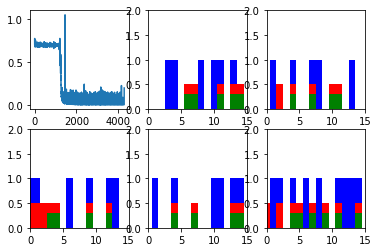

New data, epoch 66
Step 0 Loss 0.14359674


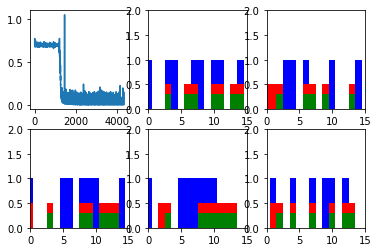

New data, epoch 67
Step 0 Loss 0.21094826


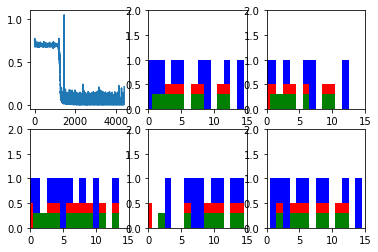

New data, epoch 68
Step 0 Loss 0.25596192


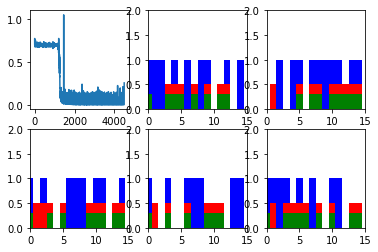

New data, epoch 69
Step 0 Loss 0.24849859


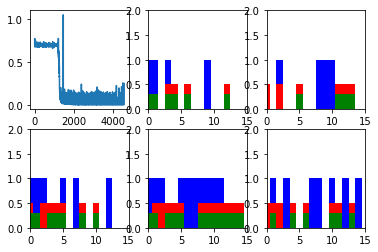

New data, epoch 70
Step 0 Loss 0.15387394


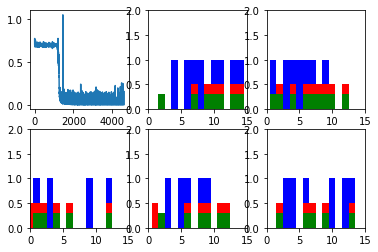

New data, epoch 71
Step 0 Loss 0.18105632


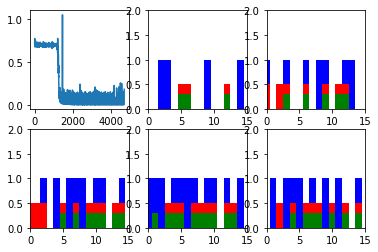

New data, epoch 72
Step 0 Loss 0.12329854


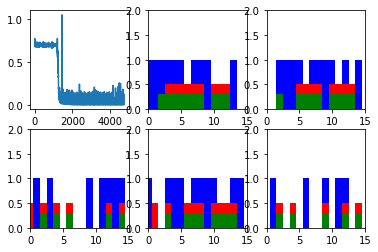

New data, epoch 73
Step 0 Loss 0.22210014


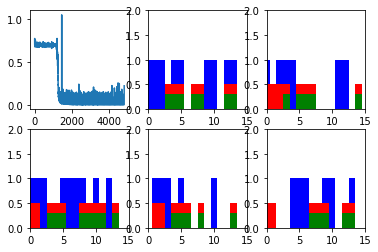

New data, epoch 74
Step 0 Loss 0.12079037


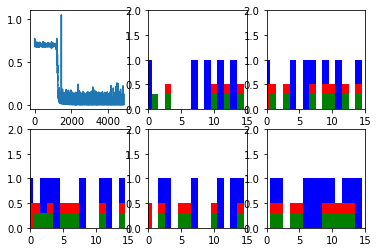

New data, epoch 75
Step 0 Loss 0.13557266


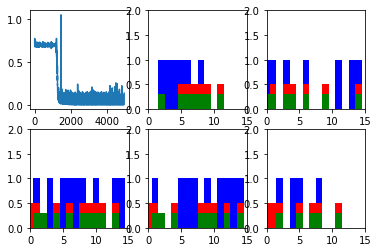

New data, epoch 76
Step 0 Loss 0.13037132


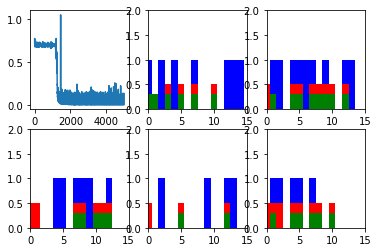

New data, epoch 77
Step 0 Loss 0.21117517


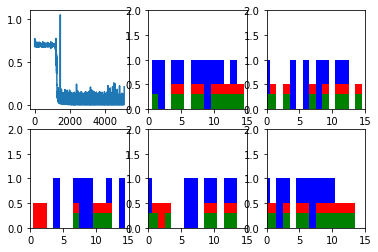

New data, epoch 78
Step 0 Loss 0.20376514


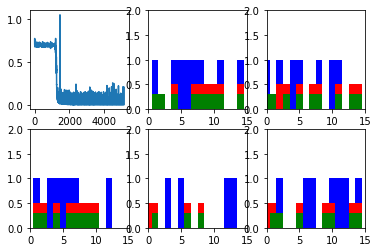

New data, epoch 79
Step 0 Loss 0.18172866


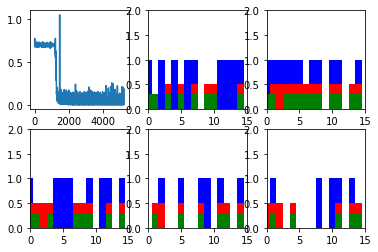

New data, epoch 80
Step 0 Loss 0.23681529


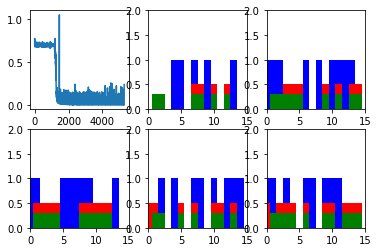

New data, epoch 81
Step 0 Loss 0.14961357


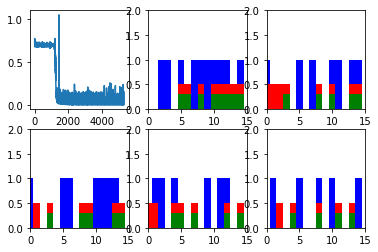

New data, epoch 82
Step 0 Loss 0.11529196


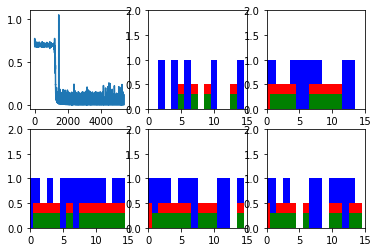

New data, epoch 83
Step 0 Loss 0.12873103


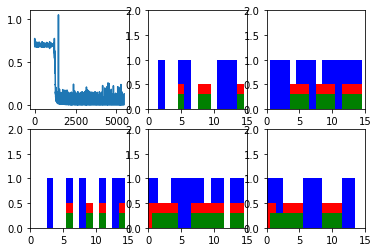

New data, epoch 84
Step 0 Loss 0.18313332


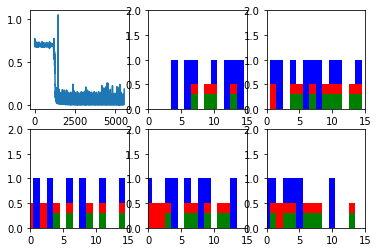

New data, epoch 85
Step 0 Loss 0.08435613


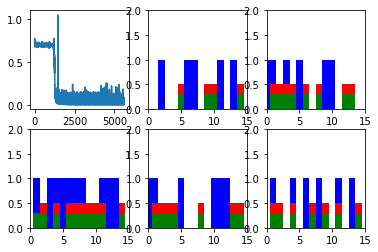

New data, epoch 86
Step 0 Loss 0.32565185


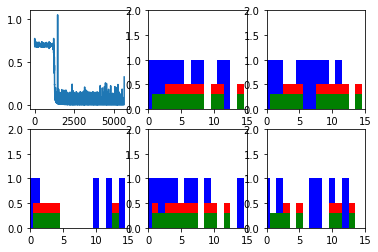

New data, epoch 87
Step 0 Loss 0.25862256


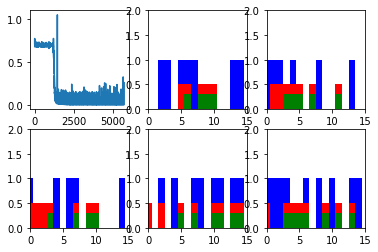

New data, epoch 88
Step 0 Loss 0.18409938


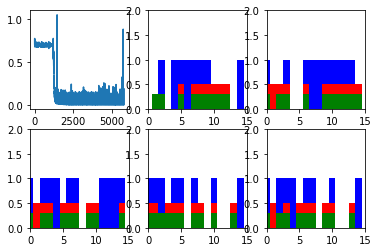

New data, epoch 89
Step 0 Loss 0.21069871


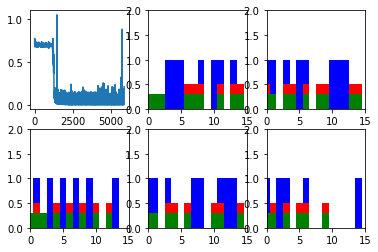

New data, epoch 90
Step 0 Loss 0.18099916


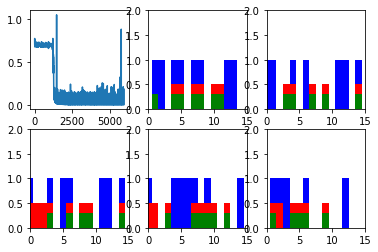

New data, epoch 91
Step 0 Loss 0.16693553


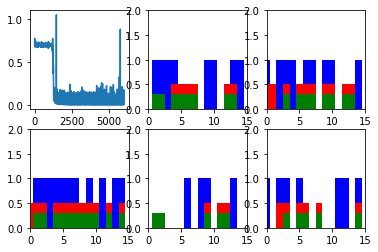

New data, epoch 92
Step 0 Loss 0.15238969


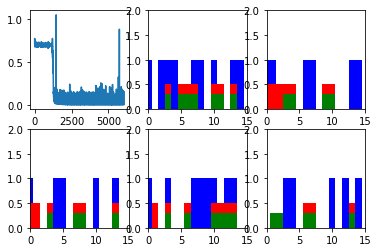

New data, epoch 93
Step 0 Loss 0.13910462


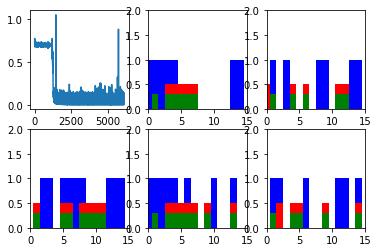

New data, epoch 94
Step 0 Loss 0.19931905


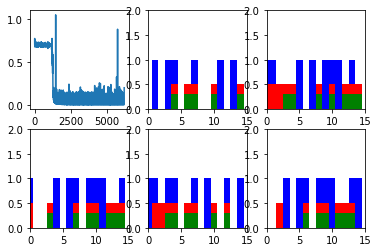

New data, epoch 95
Step 0 Loss 0.13890812


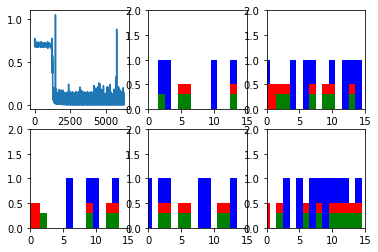

New data, epoch 96
Step 0 Loss 0.16955015


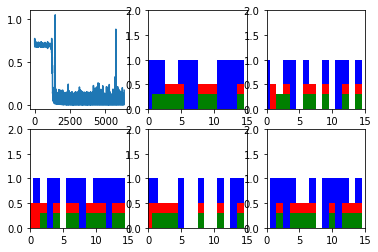

New data, epoch 97
Step 0 Loss 0.18010393


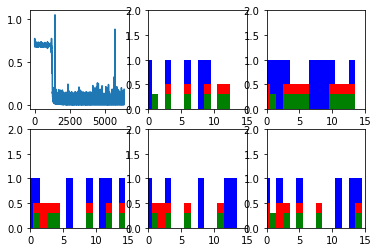

New data, epoch 98
Step 0 Loss 0.10746339


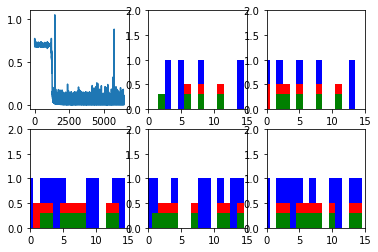

New data, epoch 99
Step 0 Loss 0.13063036


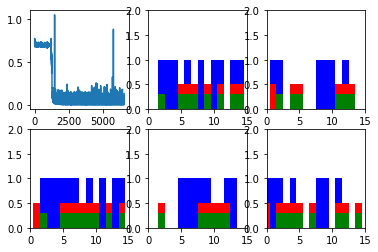

In [47]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder: batchX,
                    batchY_placeholder: batchY,
                    init_state: _current_state
                })

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()